In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Showing the image

In [2]:
image = cv.imread("test_image.jpg")
cv.imshow('result', image)
cv.waitKey(0)


-1

### Converting the RGB image to GrayScale

In [3]:
lane_image = np.copy(image)
gray = cv.cvtColor(lane_image, cv.COLOR_RGB2GRAY)
cv.imshow("result", gray)
cv.waitKey(0)

-1

### Gaussian Blur

In [4]:
blur = cv.GaussianBlur(gray, (5,5), 0)
cv.imshow("result", blur)
cv.waitKey(0)

-1

### Applying Canny method to identify edges

In [5]:
def canny(image):
    canny = cv.Canny(blur, 50, 150)
    return canny

canny_image = canny(lane_image)
cv.imshow("result", canny_image)
cv.waitKey(0)

-1

### Get Dimensions

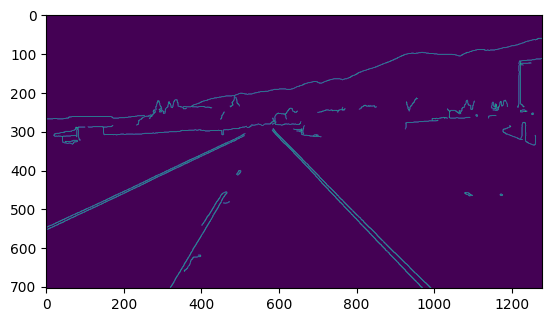

In [6]:
plt.imshow(canny_image)
plt.show()

### Finding region of interest and identifying lane lines

In [7]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200, height), (1100, height), (550, 250)]])
    mask = np.zeros_like(image)
    cv.fillPoly(mask, polygons, 255)
    return mask

cv.imshow("result", region_of_interest(canny_image))
cv.waitKey(0)

-1

### Using Bitwise and_ to get the required cropped image

In [8]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200, height), (1100, height), (550, 250)]])
    mask = np.zeros_like(image)
    cv.fillPoly(mask, polygons, 255)
    masked_image = cv.bitwise_and(image, mask)
    return masked_image

cropped_img = region_of_interest(canny_image)
cv.imshow("result", cropped_img)
cv.waitKey(0)

-1

### Getting reshaped lines

In [9]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv.line(line_image, (x1, y1), (x2, y2), (255,0,0), 10)
    return line_image

lines = cv.HoughLinesP(cropped_img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
line_image = display_lines(lane_image, lines)
cv.imshow("result", line_image)
cv.waitKey(0)

-1

### Blending the above line_image to the real image

In [10]:
combo_image = cv.addWeighted(lane_image, 0.8, line_image, 1, 1)
cv.imshow("result", combo_image)
cv.waitKey(0)

-1

### Averaged line using average of slopes and intercept

In [11]:
def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2), (y1,y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope<0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)

    return np.array([left_line, right_line])

def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1, y1, x2, y2])



averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)
cv.imshow("result", line_image)
cv.waitKey(0)

-1

### Again blending the real image with the averaged line

In [12]:
combo_image = cv.addWeighted(lane_image, 0.8, line_image, 1, 1)
cv.imshow("result", combo_image)
cv.waitKey(0)

-1

### Applying the above content in the video

In [13]:
cap = cv.VideoCapture("test2.mp4")
while(cap.isOpened()):
    _, frame = cap.read()
    canny_image = canny(frame)
    cropped_img = region_of_interest(canny_image)
    lines = cv.HoughLinesP(cropped_img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    averaged_lines = average_slope_intercept(frame, lines)
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv.addWeighted(frame, 0.8, line_image, 1, 1)
    cv.imshow("result", combo_image)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'